# Title: Working with numpy Matrices (Multidimensional Data)

**SIT220 Task 3p**  
**Name:** Zaeem Rizan  
Undergraduate Student

**Student ID:** s223134187  
**Email:** s223134187@deakin.edu.au


In this task we used data from the National Health and Nutrition Examination Survey (NHANES dataset) that give body measurements of adult males and females.





In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats


def load_data(filepath):
    return np.genfromtxt(filepath, delimiter=',', skip_header=7)


We first load the data and define a function calculate bmi. From the data there were 7 columns which were:
1. weight (kg)
2. standing height (cm)
3. upper arm length (cm)
4. upper leg length (cm)
5. arm circumference (cm)
6. hip circumference (cm)
7. waist circumference (cm).
and we added a bmi column as the 8th column calculated it. Here we print the first five entries of both male and female data.


In [5]:
male = load_data('nhanes_adult_male_bmx_2020.csv')
female = load_data('nhanes_adult_female_bmx_2020.csv')

def calculate_bmi(data):
    weight = data[:, 0]
    height_m = data[:, 1] / 100  # Convert height to meters
    bmi = weight / height_m**2
    return np.round(bmi, 1)  # Round BMI to one decimal place


male_bmi = calculate_bmi(male)
female_bmi = calculate_bmi(female)

male = np.column_stack((male, male_bmi))
female = np.column_stack((female, female_bmi))

print("Male Data with BMI:")
print(male[:5])  # Display the first five entries

print("Female Data with BMI:")
print(female[:5])  # Display the first five entries




Male Data with BMI:
[[  nan   nan   nan   nan   nan   nan   nan   nan]
 [ 98.8 182.3  42.   40.1  38.2 108.2 120.4  29.7]
 [ 74.3 184.2  41.1  41.   30.2  94.5  86.8  21.9]
 [103.7 185.3  47.   44.   32.  107.8 109.6  30.2]
 [ 86.  167.8  39.5  38.4  29.  106.4 108.3  30.5]]
Female Data with BMI:
[[  nan   nan   nan   nan   nan   nan   nan   nan]
 [ 97.1 160.2  34.7  40.8  35.8 126.1 117.9  37.8]
 [ 91.1 152.7  33.5  33.   38.5 125.5 103.1  39.1]
 [ 73.  161.2  37.4  38.   31.8 106.2  92.   28.1]
 [ 61.7 157.4  38.   34.7  29.  101.   90.5  24.9]]


**After adding a BMI column, we drew 2 histogram plots for both male and female BMIs.**


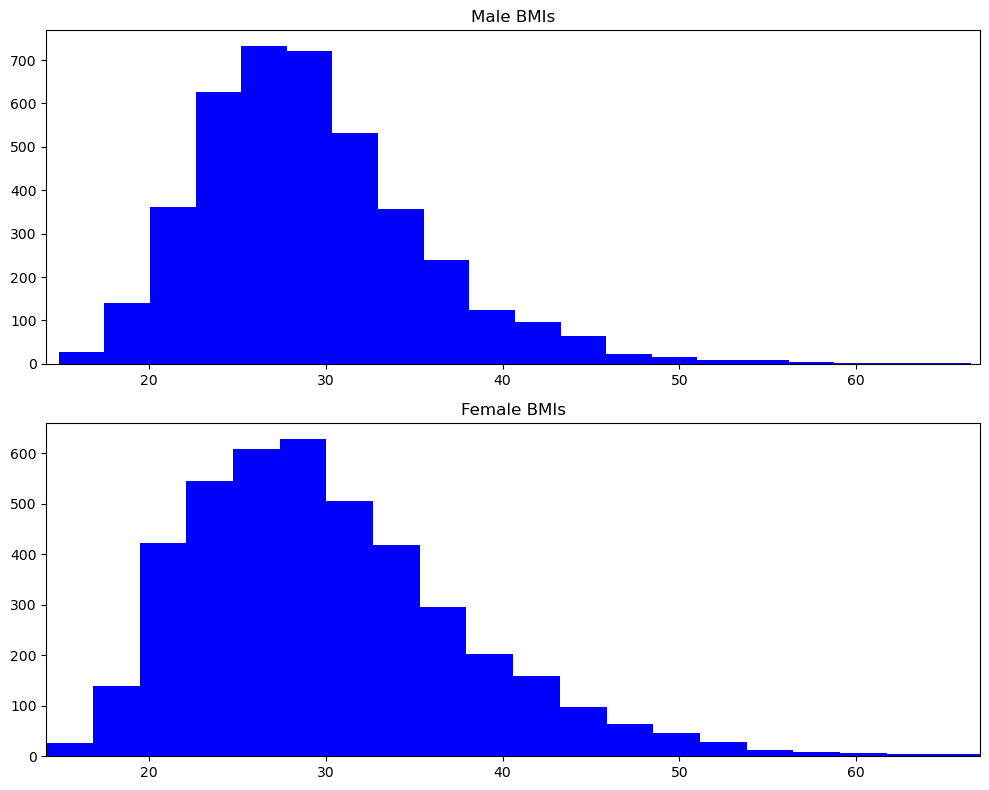

In [6]:
male_bmi = male[:, -1]
female_bmi = female[:, -1]

# Remove any potential NaN or infinite values from the BMI data
male_bmi_clean = male_bmi[~np.isnan(male_bmi) & ~np.isinf(male_bmi)]
female_bmi_clean = female_bmi[~np.isnan(female_bmi) & ~np.isinf(female_bmi)]

# Determine the x-axis limits to be the same for both subfigures
xmin = min(male_bmi_clean.min(), female_bmi_clean.min())
xmax = max(male_bmi_clean.max(), female_bmi_clean.max())

# Create the figure and the subplots
plt.figure(figsize=(10, 8))  # Adjust the size as needed

# Histogram for Male BMIs
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
plt.hist(male_bmi_clean, bins=20, color='blue')
plt.title('Male BMIs')
plt.xlim(xmin, xmax)

# Histogram for Female BMIs
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
plt.hist(female_bmi_clean, bins=20, color='blue')
plt.title('Female BMIs')
plt.xlim(xmin, xmax)

# Show the plots
plt.tight_layout() 
plt.show()


**After creating the histogram, we drew box and whisker plots for both male and female BMI.**

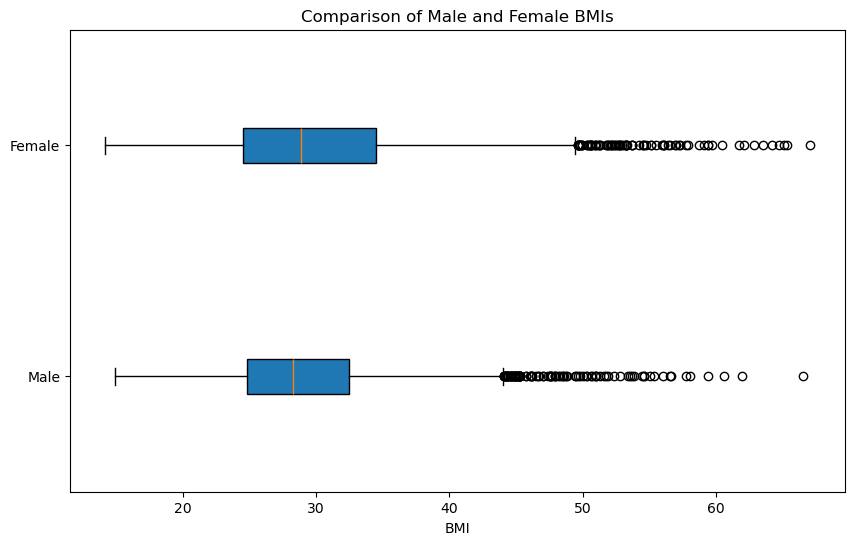

In [7]:
# Data for boxplots
data = [male_bmi_clean, female_bmi_clean]

# Create a figure and add a subplot
plt.figure(figsize=(10, 6))

# Create the boxplot with male and female BMIs
plt.boxplot(data, vert=False, patch_artist=True, labels=['Male', 'Female'])

# Add titles and labels
plt.title('Comparison of Male and Female BMIs')
plt.xlabel('BMI')

# Show the plot
plt.show()

**We Then computed the mean, median, min value, max value, standard deviation, Inter quartile range, and the skewness of the numerical dat of bmis.**

In [8]:
# Function to calculate IQR
def calc_iqr(data):
    return np.percentile(data, 75) - np.percentile(data, 25)

# Calculate the aggregates for cleaned male BMIs
aggregates_male = {
    'mean': np.mean(male_bmi_clean),
    'median': np.median(male_bmi_clean),
    'min': np.min(male_bmi_clean),
    'max': np.max(male_bmi_clean),
    'std': np.std(male_bmi_clean, ddof=1),
    'IQR': calc_iqr(male_bmi_clean),
    'skew': scipy.stats.skew(male_bmi_clean, bias=False)
}

# Calculate the aggregates for cleaned female BMIs
aggregates_female = {
    'mean': np.mean(female_bmi_clean),
    'median': np.median(female_bmi_clean),
    'min': np.min(female_bmi_clean),
    'max': np.max(female_bmi_clean),
    'std': np.std(female_bmi_clean, ddof=1),
    'IQR': calc_iqr(female_bmi_clean),
    'skew': scipy.stats.skew(female_bmi_clean, bias=False)
}

# Formatting the aggregates for display
formatted_aggregates = "## BMI\n"
formatted_aggregates += "## {:<8} {:<10} {:<10}\n".format("", "female", "male")
for key, value in aggregates_female.items():
    formatted_aggregates += "## {:<8} {:<10.2f} {:<10.2f}\n".format(
        key, aggregates_female[key], aggregates_male[key]
    )

print(formatted_aggregates)


## BMI
##          female     male      
## mean     30.10      29.14     
## median   28.90      28.30     
## min      14.20      14.90     
## max      67.00      66.50     
## std      7.76       6.31      
## IQR      10.00      7.70      
## skew     0.92       0.97      



Based on the results from the numerical analysis and visualizations described above, here's a summary of the characteristics of the male and female BMI distributions:

**Skewness**

- **Male BMI:** The skewness value is approximately 0.97, indicating a slight right-skewness or positive skewness. This suggests that the tail on the right side of the distribution is fatter than on the left side.
- **Female BMI:** With a skewness of about 0.92, the female BMI distribution also shows a right-skewed characteristic, similar to that of the male BMI distribution. This means there are also outliers with higher BMI values extending the tail on the right.

**Dispersion**

- **Standard Deviation (Std):** Female BMIs have a standard deviation of approximately 7.76, which is higher than the male BMI standard deviation of about 6.31. This indicates that female BMI values are more spread out around the mean compared to male BMI values.
- **Interquartile Range (IQR):** The IQR for females is 10.01, which is also higher than the male IQR of 7.73. The IQR measures the middle 50% of the data, and a higher IQR for females further supports the observation of greater dispersion in female BMI values compared to males.

**Central Tendency**

- **Mean and Median:** Both distributions have means slightly higher than their medians, which is consistent with a positive skewness. The mean BMI for females is around 30.10, and for males, it is approximately 29.14. The medians are close to these values but slightly lower, which typically indicates a skewed distribution.

**Outliers and Range**

- **Minimum and Maximum:** The range of BMI values (from the minimum to the maximum) provides insight into the overall spread and potential outliers. The maximum BMI for females is 67.04, and for males, it is 66.50, suggesting that both distributions have high-BMI outliers. The minimum values do not vary much between genders, indicating similar lower bounds for BMI.






**We then created a scatterplot matrix for the following male measurements: heights, weights, waist circumferences, and hip circumferences.**

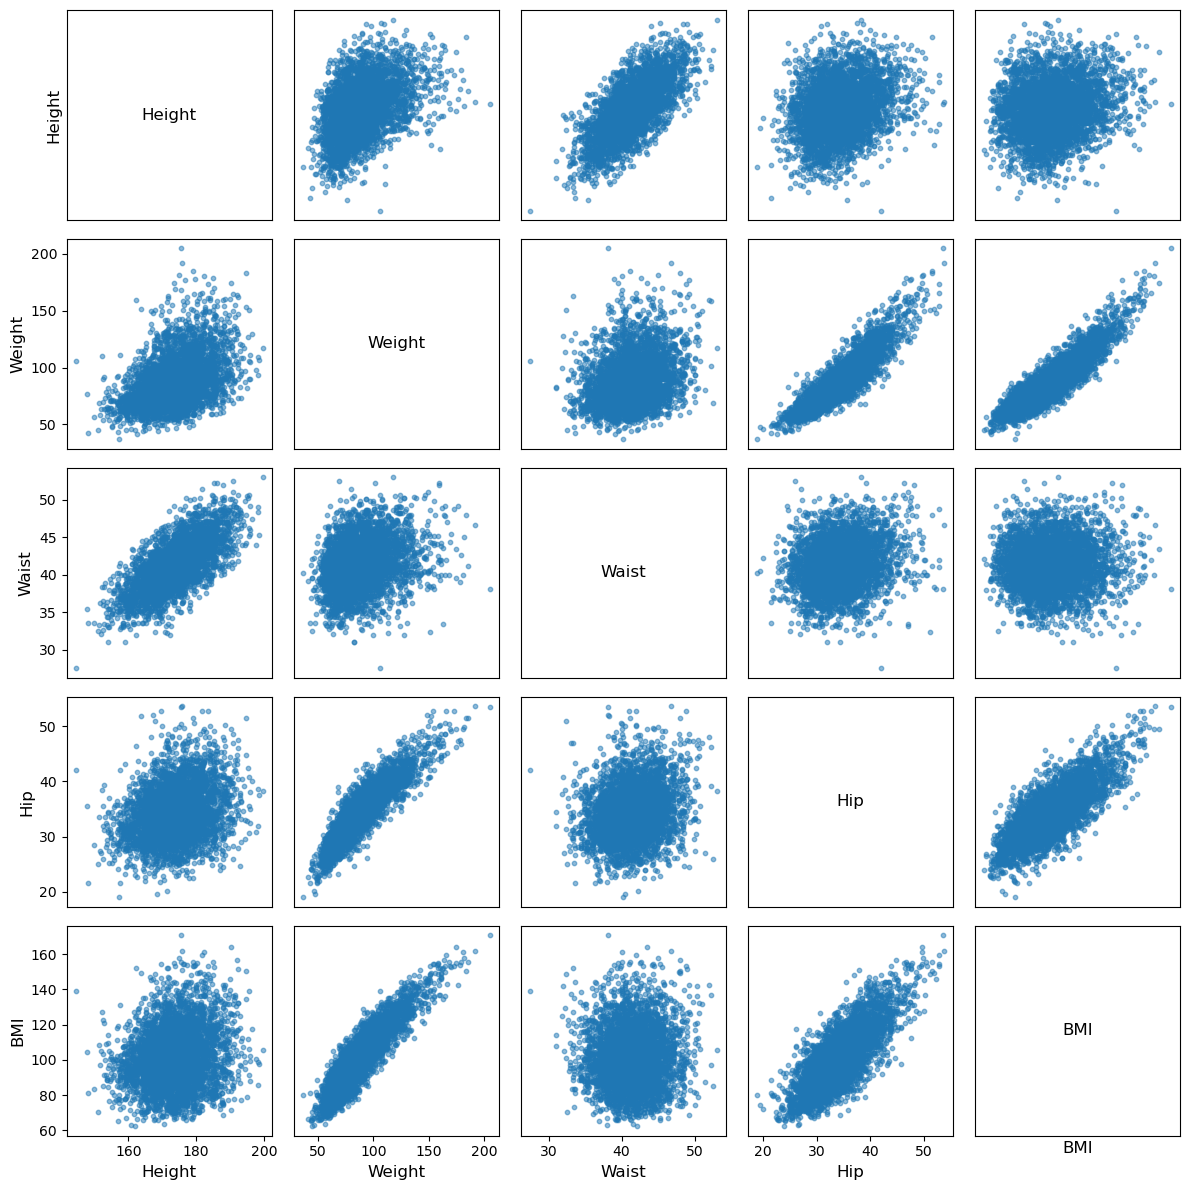

In [9]:
# Function to create a scatterplot matrix
def scatterplot_matrix(data, labels):
    # Number of variables we're plotting.
    numvars, numdata = data.shape
    fig, axes = plt.subplots(nrows=numvars, ncols=numvars, figsize=(12,12))
    
    # Plot scatter or just text for diagonal.
    for i in range(numvars):
        for j in range(numvars):
            ax = axes[i,j]
            if i == j:
                ax.text(0.5, 0.5, labels[i], transform=ax.transAxes,
                        horizontalalignment='center', verticalalignment='center',
                        fontsize=12)
                ax.set_xticks([])
                ax.set_yticks([])
                continue
            
            # Scatterplot for off-diagonal
            ax.scatter(data[j], data[i], s=10, alpha=0.5)
            
            # Set the same limits on all plots for comparability
            if i < numvars - 1: ax.set_xticks([])
            if j > 0: ax.set_yticks([])
                
    # Set labels on the outer axes
    for i, label in enumerate(labels):
        axes[i,0].set_ylabel(label, size='large')
        axes[-1,i].set_xlabel(label, size='large')
    
    plt.tight_layout()
    plt.show()

# Load the male dataset (Assuming you have already loaded it before in the variable `male_data`)
male_data_path = 'nhanes_adult_male_bmx_2020.csv'
male_data = np.genfromtxt(male_data_path, delimiter=',', skip_header=1)

# Columns: [1: Height, 0: Weight, 3: Waist circumference, 4: Hip circumference, -1: BMI]
# Extract these columns from the male dataset
columns_of_interest = [1, 0, 3, 4, -1]
male_selected_data = male_data[:, columns_of_interest]

# Remove rows with any NaNs in the columns of interest
male_selected_data = male_selected_data[~np.isnan(male_selected_data).any(axis=1)]

# Labels for the plots
labels = ['Height', 'Weight', 'Waist', 'Hip', 'BMI']

# Generate the scatterplot matrix
scatterplot_matrix(male_selected_data.T, labels)


 **Finally, we calculated both Pearson’s and Spearman’s correlation coefficients for the following pairs of measurements: height, weight, waist circumference, hip circumference, and BMI.**

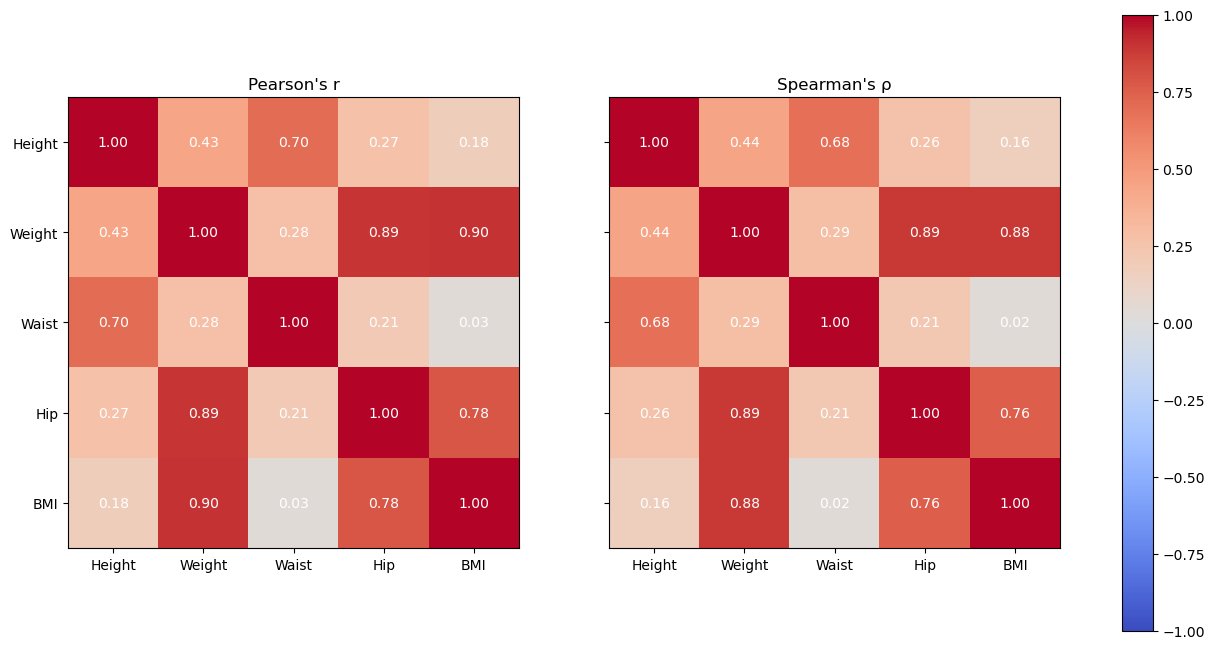

In [10]:
# Function to calculate Pearson and Spearman correlation matrices
def correlation_matrices(data):
    pearson_corr = np.corrcoef(data.T)
    spearman_corr = scipy.stats.spearmanr(data).correlation
    return pearson_corr, spearman_corr

# Function to plot correlation heatmaps
def plot_heatmaps(corr_matrix_pearson, corr_matrix_spearman, labels):
    fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

    # Pearson Correlation Heatmap
    im = axes[0].imshow(corr_matrix_pearson, interpolation='nearest', cmap='coolwarm', vmin=-1, vmax=1)
    axes[0].set_title("Pearson's r")
    axes[0].set_xticks(np.arange(len(labels)))
    axes[0].set_yticks(np.arange(len(labels)))
    axes[0].set_xticklabels(labels)
    axes[0].set_yticklabels(labels)

    # Print the correlation values in the cells
    for i in range(len(labels)):
        for j in range(len(labels)):
            axes[0].text(j, i, f"{corr_matrix_pearson[i, j]:.2f}",
                          ha='center', va='center', color='w')

    # Spearman Correlation Heatmap
    axes[1].imshow(corr_matrix_spearman, interpolation='nearest', cmap='coolwarm', vmin=-1, vmax=1)
    axes[1].set_title("Spearman's ρ")
    axes[1].set_xticks(np.arange(len(labels)))
    axes[1].set_xticklabels(labels)

    # Print the correlation values in the cells
    for i in range(len(labels)):
        for j in range(len(labels)):
            axes[1].text(j, i, f"{corr_matrix_spearman[i, j]:.2f}",
                          ha='center', va='center', color='w')

    fig.colorbar(im, ax=axes, orientation='vertical')
    plt.show()

# Load your data and select columns of interest as done previously
# ...

# Calculate the correlation matrices for the selected data
pearson_corr, spearman_corr = correlation_matrices(male_selected_data)

# Plot the heatmaps for the correlation matrices
plot_heatmaps(pearson_corr, spearman_corr, labels)

**The scatterplot matrix offers a visual depiction of the relationships between pairs of variables. Below are some potential observations gleaned from the matrix:**

- **Height and Weight:** A moderate positive correlation is apparent between height and weight, as taller individuals typically weigh more.
- **Weight and Waist Circumference:** A strong positive correlation is evident, indicating that as weight increases, waist circumference tends to increase too. This association underscores the influence of body weight on waist size.
- **Weight and Hip Circumference:** Similar to waist circumference, a strong positive correlation exists with hip circumference, reflecting the impact of weight gain on both waist and hip measurements.
- **Waist and Hip Circumference:** A strong positive correlation implies that individuals with larger waist sizes tend to have larger hip measurements.
- **BMI:** The correlation of BMI with height is weak, as BMI is a function of weight and height squared, making its relationship with height more intricate. However, BMI demonstrates a strong positive correlation with weight, waist, and hip measurements. This suggests that as individuals' circumferences increase, their BMI tends to rise as well, aligning with the BMI definition.




**Correlation coefficients quantify the observations from the scatterplot matrix:**

**Pearson’s Coefficients:** Pearson's correlation measures linear relationships between variables. High positive values (close to +1) indicate a strong positive linear correlation. The heatmap confirmed the visual relationships, showing strong correlations between weight, waist, and hip measurements. The weaker correlations involving height also aligned with the scatterplots.

**Spearman’s Coefficients:** Spearman's correlation measures monotonic relationships, whether linear or not. The Spearman coefficients were generally in line with the Pearson coefficients, indicating that the relationships are both linear and monotonic. Similar strengths of correlations were observed, but with slight differences in magnitude, which could suggest that some of the relationships are not perfectly linear but still consistently increasing.

In both Pearson's and Spearman's coefficients, we see strong correlations among the physical measurements (weight, waist, and hip), except for height, which has a more complex relationship with these variables. BMI correlates strongly with weight and circumferences, confirming that BMI is a good proxy for body fatness and overall body size.

These observations can be useful for health assessments, as they highlight the importance of considering multiple body measurements together, rather than in isolation, to understand an individual's physical health and potential risk factors associated with measurements like waist circumference and BMI.

